# **<span style="color: #FF5733;">Data Visualization</span>**
<span style="color: #FF5733;">Daniel Camacho</span><br>
<span style="color: #FF5733;">dacamachoh1@gmail.com</span><br><br><br>

Unos ejercicios de visualización de datos siguiendo los consejos en el libro: 
-   *Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures* 

<img src="data_viz_book.png" alt="Descripción de la imagen" style="width: 400px;">


Setup:

In [1]:
# Requerimientos: 
import os
import json
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import re 
import warnings
import plotly.io as pio
import pandas as pd
from IPython.display import Image

# Especifica la ruta a tu archivo kaggle.json
kaggle_json_path = './kaggle.json'

# Carga las credenciales desde el archivo kaggle.json
with open(kaggle_json_path, 'r') as file:
    kaggle_credentials = json.load(file)

os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']
from kaggle.api.kaggle_api_extended import KaggleApi


# Ignorar todos los warnings
warnings.filterwarnings('ignore')


Obtener data de Kagle con credenciales de la API:

In [2]:
# Autentica con Kaggle
api = KaggleApi()
api.authenticate()

# Descarga el dataset
dataset_path = 'girumwondemagegn/dataset-for-renewable-energy-systems'
api.dataset_download_files(dataset_path, path='./data', unzip=True)

message = 'Datos descargados con éxito por medio de la API de Kaggle'
print(message)

Dataset URL: https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems
Datos descargados con éxito por medio de la API de Kaggle


Leer data:

In [3]:
df = pd.read_csv('data/energy_dataset_.csv')
print('Dimensiones del dataframe:', df.shape)

Dimensiones del dataframe: (15000, 13)


Por ejemplo, esta gráfica tiene un error (proviene de esta [notebook](https://www.kaggle.com/code/edmund24/eda-of-renewable-energy-systems)): 


>>> Wrong:


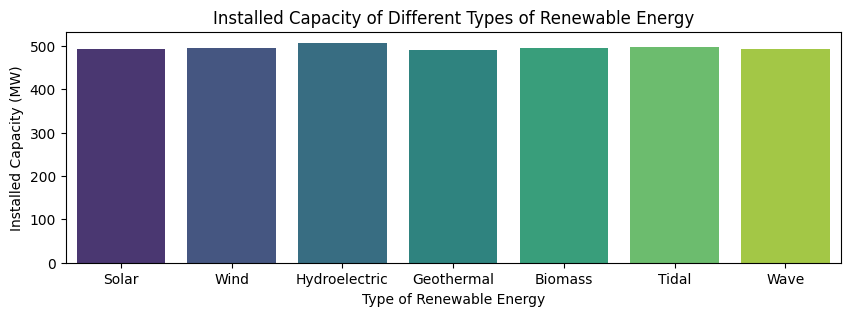

In [14]:
plt.figure(figsize=(10, 3))
sns.barplot(x='Type_of_Renewable_Energy', y='Installed_Capacity_MW', data=df, ci=None, palette='viridis')
plt.title('Installed Capacity of Different Types of Renewable Energy')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Installed Capacity (MW)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Solar', 'Wind', 'Hydroelectric', 'Geothermal', 'Biomass', 'Tidal', 'Wave'])
print('\n>>> Wrong:')
plt.show()

Errores de esa gráfica: 
-   No se sabe cuál tiene más MW
-   ni cuánta es la diferencia
-   Ni se sabe si es la media, mediana o que en el eje y
-   No se necesitan ticks en eje y 

Corrección, usando plotly:


>>> Good:


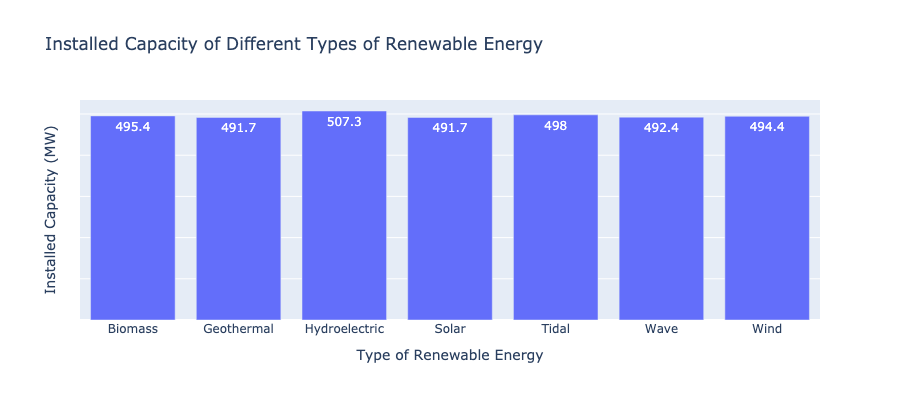

In [21]:
# Crear variable de eje
energy_map = {
    1: 'Solar',
    2: 'Wind',
    3: 'Hydroelectric',
    4: 'Geothermal',
    5: 'Biomass',
    6: 'Tidal',
    7: 'Wave'
}

# Crear la columna 'Type_of_Renewable_Energy_label'
df['Type_of_Renewable_Energy_label'] = df['Type_of_Renewable_Energy'].map(energy_map)

# Agrupar a la media
tab = df.groupby('Type_of_Renewable_Energy_label').agg(
    Installed_Capacity_MW = ('Installed_Capacity_MW', 'mean')).reset_index()

# Redondear para verla más limpia
tab['Installed_Capacity_MW'] = tab['Installed_Capacity_MW'].round(1)

fig = px.bar(tab, 
             x='Type_of_Renewable_Energy_label', 
             y='Installed_Capacity_MW',
             title='Installed Capacity of Different Types of Renewable Energy',
             labels={'Type_of_Renewable_Energy_label': 'Type of Renewable Energy', 
                     'Installed_Capacity_MW': 'Installed Capacity (MW)'},
             text='Installed_Capacity_MW')
fig.update_yaxes(showticklabels=False, 
                 title_standoff=20)
# Guardar la imagen como PNG
pio.write_image(fig, 'plots/plot1.png', width=900, height=400)

# Mostrar la imagen guardada
print('\n>>> Good:')
Image('plots/plot1.png')